In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fqtoolkit import dgToDf as dtd
import statsmodels.api as sm

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
assets, liability, sale, income, price = [item[1] for item in dtd("data2.xlsx", "Sheet1", 5).items()]

In [4]:
assets0 = assets.pct_change()

liability0 = liability.pct_change()

In [11]:
#asset, liability value는 12개월간 변하지 않으므로, 가장 최근 주어진 변화율로 0을 다 채움.

assets0 = assets0.where(assets0 != 0, np.nan).fillna(method="ffill")

liability0 = liability0.where(liability0 != 0, np.nan).fillna(method="ffill")

In [47]:
#shift를 통해 정보를 실제로 얻는 시점까지 미룸

assets0 = assets0.shift(12+6)
liability0 = liability0.shift(12+6)
sale = sale.shift(12+6)
income = income.shift(12+6)

In [48]:
sale.head(30)

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
returns = price.pct_change()

In [50]:
price = price.dropna(axis=1)
returns = price.shift(0).pct_change()
returns0 = price.shift(0).pct_change()
returns.head(20)

,삼성전자,SK하이닉스,삼성SDI,현대차,카카오,기아,POSCO홀딩스,현대모비스,한국전력,SK텔레콤,...,기업은행,롯데케미칼,한국조선해양,한온시스템,HLB,CJ ENM,동진쎄미켐,동화기업,네이처셀,주성엔지니어링
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-0.082353,-0.321969,-0.260679,-0.295339,0.514400,-0.334669,-0.161663,-0.346719,-0.184405,0.111123,...,-0.256729,-0.098794,-0.134601,-0.312377,0.104167,0.382981,0.811111,-0.411042,0.519904,0.274816
2000-03-31,0.308528,0.374299,0.246199,0.112115,-0.442917,0.118542,-0.044846,0.000000,0.113050,-0.142876,...,-0.097493,-0.022608,0.025397,0.000000,1.113207,0.092308,-0.187611,0.634200,0.684271,-0.244460
2000-04-30,-0.104579,-0.284553,0.129266,-0.220115,-0.487833,0.007934,-0.184961,0.019490,0.031743,-0.180542,...,-0.036265,-0.234328,-0.294147,0.105714,-0.075893,-0.428163,-0.188794,-0.111360,-0.078178,-0.087366
2000-05-31,0.026641,0.000000,-0.071280,0.157807,0.535240,0.226033,-0.020750,-0.091544,-0.067676,0.305103,...,0.128102,-0.275832,-0.074534,-0.108527,-0.615459,0.002460,-0.228829,0.330308,-0.357586,-0.283624
2000-06-30,0.199722,0.250001,0.255939,0.181818,0.315195,0.035772,0.118782,0.350061,0.141908,-0.051978,...,0.995032,-0.110676,-0.004705,0.136232,0.268844,-0.103194,-0.088785,-0.178734,0.266484,0.054159
2000-07-31,-0.200463,-0.209091,-0.078515,0.045470,-0.326419,0.124862,-0.069781,0.059053,-0.069384,-0.238361,...,-0.419424,0.002489,-0.047619,0.122449,0.708911,0.173958,-0.328632,-0.040157,-0.406243,-0.457172
2000-08-31,-0.072947,0.166668,0.004074,0.123720,-0.030795,-0.062389,-0.068183,0.090858,0.012450,-0.122304,...,-0.098039,0.021390,0.099927,-0.006818,-0.507532,0.026840,-0.021642,0.041837,0.449156,-0.094646
2000-09-30,-0.261334,-0.214286,-0.109097,-0.136872,-0.158951,-0.096348,0.012195,-0.135963,-0.107397,0.114769,...,0.015625,-0.130703,-0.090849,-0.178490,-0.360000,-0.193180,-0.013663,-0.113316,-0.268767,-0.417404


In [ ]:
from sklearn.metrics import classification_report


results = {}
r2 = []

for maxD in range(1,20):

    for col in returns.columns:

        reSeries = {}

        for n in range(1, returns.shape[0]-152):

            #n부터 n+1**까지의 롤링 데이터 준비
            temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+151], #n시점의 총자산 변화율
                                "liability":liability0[col].iloc[n:n+151], #n시점의 총부채 변화율
                                "sale":sale[col].iloc[n:n+151], #n시점의 매출액
                                "income":income[col].iloc[n:n+151], #n시점의 영업이익
                                 "re0": returns[col].iloc[n-1:n+150], #n-1시점의 종목 수익률
                                "re": returns[col].iloc[n:n+151]}) #n시점의 종목 수익률

            temp = temp.dropna() # 데이터 결측치 제거


            if temp.shape[0] < 50: #만약 결측치를 제거하였을 때도 길이가 50보다 작을 경우, signal 생성을 하지 않음

                continue

            model = DecisionTreeRegressor(max_depth=maxD, random_state=10)

            model.fit(temp.drop("re", axis=1).iloc[:-1,:], temp["re"].iloc[:-1]) #현재 수익률 추정 모형 fitting

            r = model.predict(temp.drop("re", axis=1).iloc[[-1], :]) #현재 시점의 추정 수익률 계산

            reSeries[temp.index[-1]] = temp["re"].iloc[-1]-r[0] #현재 시점의 추정오차 저장

            if len(reSeries) > 0: #추정오차 데이터가 있는 경우만 signal 저장
                results[col] = pd.Series(reSeries) 


    results = pd.DataFrame(results) #시그널 데이터프레임화


    signal = (results).mean(axis=1) #종목별 시그널 통합

    temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna() #성능 측정용 데이터 준비
    test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :] #validation set
    test0 = temp.iloc[2*int(temp.shape[0]/4):, :] #test set

    mu = temp.result.iloc[:int(temp.shape[0]/4)].mean() #training set에서의 signal 평균
    sd = temp.result.iloc[:int(temp.shape[0]/4)].std() #training set에서의 signal 표준편차

    test.result = (test.result-mu)/sd #training set 평균 표준편차를 이용한 정규화

    test0.result = (test0.result-mu)/sd #training set 평균 표준편차를 이용한 정규화

    # signal과 미래 수익률 간의 R Squared 측정

    print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")



/Users/gimhyeonjun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0.1890%


/Users/gimhyeonjun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


4.2554%


/Users/gimhyeonjun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1.6188%


/Users/gimhyeonjun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


4.6528%


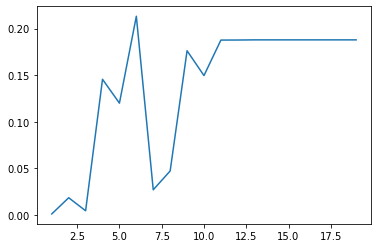

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(1, 20)), r2)

In [31]:
maxD = 12


for col in returns.columns:

    reSeries = {}

    for n in range(1, returns.shape[0]-152):

            #n부터 n+120까지의 롤링 데이터 준비
        temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+151],
                                "liability":liability0[col].iloc[n:n+151],
                                "sale":sale[col].iloc[n:n+151],
                                "income":income[col].iloc[n:n+151],
                                 "re0": returns[col].iloc[n-1:n+150],
                                "re": returns[col].iloc[n:n+151]})

        temp = temp.dropna()


        if temp.shape[0] < 50:

            continue

        model = DecisionTreeRegressor(max_depth=maxD, random_state=10)#

        model.fit(temp.drop("re", axis=1).iloc[:-1,:], temp["re"].iloc[:-1])

        r = model.predict(temp.drop("re", axis=1).iloc[[-1], :])

        reSeries[temp.index[-1]] = temp["re"].iloc[-1]-r[0]

        if len(reSeries) > 0:
            results[col] = pd.Series(reSeries)





In [32]:
results = pd.DataFrame(results)


signal = (results).mean(axis=1)

temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna()
test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :]
test0 = temp.iloc[2*int(temp.shape[0]/4):, :]

mu = temp.result.iloc[:int(temp.shape[0]/4)].mean()
sd = temp.result.iloc[:int(temp.shape[0]/4)].std()

test.result = (test.result-mu)/sd

test0.result = (test0.result-mu)/sd


test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
test0["returns+"] = np.where(test0["returns"] > 0, test0["returns"], 0)

test["port"] = test["returns"]* np.where( test.result< 0, -test.result, 0)#
test0["port"] = test0["returns"] * np.where( test0.result< 0, -test0.result, 0)#-#np.where( -1*test0.result > 0, 1, 0)


print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")

print(classification_report(np.where(test.returns> 0, 1, 0), np.where(-test.result >0, 1, 0)))

r2.append(np.corrcoef(test.returns, -test.result)[1,0 ] ** 2)


18.7726%
              precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.68      0.65      0.67        20

    accuracy                           0.55        29
   macro avg       0.49      0.49      0.49        29
weighted avg       0.56      0.55      0.56        29



/Users/gimhyeonjun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-32-4bbb8ba279a1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
<ipython-input-32-4bbb8ba279a1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
tVals = []

ports = {}

for col in results.columns:
    
    temp = pd.DataFrame({"returns":returns.shift(-1)[col], "result":results[col]}).dropna()
    test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :]
    test0 = temp.iloc[2*int(temp.shape[0]/4):, :]

    mu = temp.result.iloc[:int(temp.shape[0]/4)].mean()
    sd = temp.result.iloc[:int(temp.shape[0]/4)].std()

    test.result = (test.result-mu)/sd

    test0.result = (test0.result-mu)/sd


    test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
    test0["returns+"] = np.where(test0["returns"] > 0, test0["returns"], 0)

    test["port"] = test["returns"]* np.where( test.result< 0, -test.result, 0)#
    test0["port"] = test0["returns"] * np.where( test0.result< 0, -test0.result, 0)
    
    ports[col] = test0["port"]

    tVals.append(sm.OLS(test0["port"], sm.add_constant(test0[["returns", "returns+"]])).fit().tvalues["returns+"])

    

In [34]:
ports = pd.DataFrame(ports)

ports.head()

,삼성전자,SK하이닉스,삼성SDI,현대차,카카오,기아,POSCO홀딩스,현대모비스,한국전력,SK텔레콤,...,기업은행,롯데케미칼,한국조선해양,한온시스템,HLB,CJ ENM,동진쎄미켐,동화기업,네이처셀,주성엔지니어링
2017-05-31,0.000000,0.0,0.000000,-0.045597,0.000000,-0.000000,0.007353,-0.000000,-0.000000,0.035712,...,0.000000,-0.032243,0.000000,0.000255,0.000000,-0.000192,0.267578,0.002030,0.000113,0.010013
2017-06-30,0.000000,-0.0,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,0.022520,-0.000000,-0.002183,-0.003412,0.018207,0.000000,0.005400,0.004012,0.021986
2017-07-31,-0.115230,0.0,0.000000,-0.000000,0.001695,-0.000000,0.263972,-0.000000,-0.001516,-0.004742,...,-0.045079,0.000000,-0.000000,0.000000,-0.000000,0.080858,0.980780,-0.002482,0.000000,0.000000
2017-08-31,0.000000,0.0,0.012815,0.087292,0.020244,-0.012234,-0.011207,0.004798,-0.022051,0.000000,...,-0.046567,-0.005479,-0.000000,0.044762,0.005254,-0.013609,0.000000,-0.002127,-0.024062,-0.017592
2017-09-30,0.099455,-0.0,0.002288,0.014639,0.000000,0.000000,0.000000,0.065959,0.004535,0.006245,...,0.000000,-0.000000,0.014369,0.017794,0.000000,-0.000006,0.009075,0.000539,0.019293,-0.011930


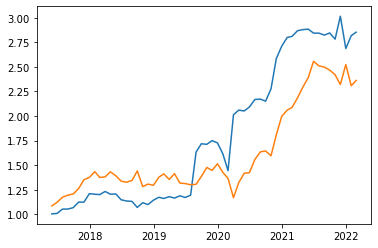

In [35]:
plt.plot((1+ports.mean(axis=1)).cumprod())
plt.plot((1+returns.loc[ports.index, :].mean(axis=1)).cumprod())

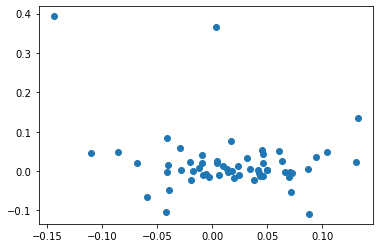

In [39]:
plt.plot(test["market"], test["port"], "o")

In [40]:
test = pd.DataFrame({"port":ports.mean(axis=1), "market":returns.loc[ports.index, :].mean(axis=1)}).dropna()
test["market+"] = np.where(test["market"] > 0,test["market"] , 0 )
test.head()

,port,market,market+
2017-05-31,0.005299,0.086510,0.086510
2017-06-30,0.005170,0.033965,0.033965
2017-07-31,0.043121,0.045764,0.045764
2017-08-31,0.000681,0.018049,0.018049
2017-09-30,0.013240,0.010192,0.010192


In [41]:
sm.OLS(test["port"], sm.add_constant(test[["market", "market+"]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   port   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     4.215
Date:                Thu, 02 Jun 2022   Prob (F-statistic):             0.0198
Time:                        12:03:12   Log-Likelihood:                 69.539
No. Observations:                  58   AIC:                            -133.1
Df Residuals:                      55   BIC:                            -126.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.016     -0.144      0.886      -0.035       0.030
market        -1.0894      0.381     -2.859      0.006      -1.853      -0.326
market+        1.3357      0.587      2.276      0.027       0.159       2.512
==============================================================================
Omnibus:                       54.816   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.098
Skew:                           2.487   Prob(JB):                     2.58e-76
Kurtosis:                      13.923   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AttributeError: 'DataFrame' object has no attribute 'returns'

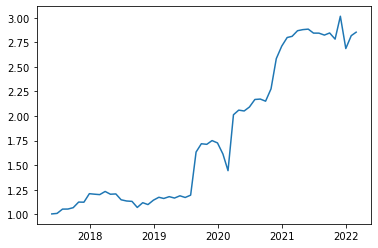

In [42]:
plt.plot((1+test["port"]).cumprod())
plt.plot((1+test.returns).cumprod())

In [ ]:
sm.OLS(test["port"], sm.add_constant(test[["returns", "returns+"]])).fit().summary()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(f"{np.corrcoef(test0.returns, -test0.result)[1,0 ] ** 2 * 100:.4f}%")
    
print(classification_report(np.where(test0.returns> 0, 1, 0), np.where(-test0.result >0, 1, 0)))

In [ ]:
plt.plot((1+test0["port"]).cumprod())
plt.plot((1+test0.returns).cumprod())

In [ ]:
test0.where(test0.result < 0, np.nan).corr() ** 2

In [ ]:
plt.plot(test0.returns ,test0["port"], "o")

In [ ]:
print(test0["port"].mean() * np.sqrt(12)/ test0["port"].std())
print(test0["returns"].mean() * np.sqrt(12)/ test0["returns"].std())

In [ ]:
test0.corr()

In [ ]:
sm.OLS(test0["port"], sm.add_constant(test0[["returns", "returns+"]])).fit().summary()

In [ ]:
plt.plot((1+test0["returns"]).cumprod())

In [ ]:
np.mean(np.where(test0["returns"]>0, 1, 0))

In [43]:
from itertools import combinations as c

def estimation(bench, port):
    
    n0 = 0
    
    n = 0
    
    for t1, t2, t3 in c(range(len(bench)), 3):
        
        n0 += 1
        
        rms = bench.iloc[[t1, t2, t3]].sort_values()
        
        trueT1, trueT2, trueT3 = rms.index
        
        betaH = (port.loc[trueT3] - port.loc[trueT2]) / (bench.loc[trueT3] - bench.loc[trueT2])
        
        betaL = (port.loc[trueT2] - port.loc[trueT1]) / (bench.loc[trueT2] - bench.loc[trueT1])
        
        if betaH > betaL:
            
            n += 1
            
            
    return 2*(n / n0) -1
        
    
def kernel(rms, ris):
    
    rm1, rm2, rm3 = rms
    ri1, ri2, ri3 = ris
    
    premise = rm1 < rm2 and rm2 < rm3
    
    if not premise:
        
        return 0
    
    betaH = (ri3 - ri2) / (rm3 - rm2)
        
    betaL = (ri2 - ri1) / (rm2 - rm1)
    
    conclusion = betaH > betaL
    
    
    if  premise and not conclusion:
        
        return 0
    
    else:
        
        return 1
    
    
    
def stanardE(bench, port, esti):
    
    sum0 = 0
    
    for t1 in bench.index:
        
        sum1 = 0
        
        n0 = 0
        
        for t2, t3 in c(bench.index, 2):
            
            n0 += 1
            
            sum1 += kernel(bench.loc[[t1, t2, t3]], port.loc[[t1, t2, t3]])
            
            
        sum1 = (sum1 / n0 - esti) ** 2
        
        sum0 += sum1
        
        
    
    var = 9 / len(bench.index) * sum0
    
    return np.sqrt(var)
    
from scipy.stats import norm

def nonParaMT(bench, port):
    
    esti = estimation(bench, port)
    se = stanardE(bench, port, esti)
    
    statistic = esti * np.sqrt(len(bench)) /se
    
    pVal = 1 - norm.cdf(statistic, loc=0, scale=1)
    
    return esti, se , statistic, pVal

In [44]:
nonParaMT(test0["returns"], test0["port"])

<ipython-input-43-35b4a41fd108>:19: RuntimeWarning: invalid value encountered in double_scalars
  betaL = (port.loc[trueT2] - port.loc[trueT1]) / (bench.loc[trueT2] - bench.loc[trueT1])
<ipython-input-43-35b4a41fd108>:17: RuntimeWarning: invalid value encountered in double_scalars
  betaH = (port.loc[trueT3] - port.loc[trueT2]) / (bench.loc[trueT3] - bench.loc[trueT2])


(0.001879699248120259,
 0.4854230092801,
 0.02949049119483867,
 0.48823670128600327)